Proyek Analisis Data: E-Commerce Public Dataset
Nama: Muhammad Ivan Dimitra
Email: 	A010YBM329@devacademy.id
ID Dicoding: 	A010YBM329

Menentukan Pertanyaan Bisnis
Pertanyaan 1: Wilayah mana yang merupakan customer terbanyak dari e-commerce ini?
Pertanyaan 2: Produk kategori apa yang paling banyak diorder?

Import Semua Packages/Library yang Digunakan

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
import os
print(os.getcwd())  # Menampilkan direktori kerja saat ini

c:\Users\Pongo\Downloads\submission


Data Wrangling

Gathering Data

In [102]:
customers_df = pd.read_csv("data/olist_customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [103]:
geolocation_df = pd.read_csv("data/olist_geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [104]:
order_items_df = pd.read_csv("data/olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [105]:
product_df = pd.read_csv("data/olist_products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Insight:
- saya berhasil meload 4 jenis dataset, yaitu data customers, geolocation, order_items, dan products
- terdapat variasi jumlah kolom dari masing-masing dataset, dengan dataset product yang paling banyak kolomnya

Assessing Data

In [106]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [107]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [108]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [109]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [110]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [111]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [112]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [113]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [114]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


In [115]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [116]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [117]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [118]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Insight:
- Menurut saya, di sini yang perlu di pakai isna() hanya product.df karena jumlah datanya tidak sama, selain itu sama semua.
- Terdapat kesalahan tipe data pada dataset order_item yaitu shipping_limit_date
- Terdapat duplikasi pada dataset geolocation

Cleaning Data

In [119]:
geolocation_df.drop_duplicates(inplace=True)


In [120]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [121]:
datetime_columns = ["shipping_limit_date"]
for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [122]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [123]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [124]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [125]:
product_df[product_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [126]:
product_df[product_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
product_df.shape

(32951, 9)

In [128]:
product_df.dropna(inplace=True)

In [129]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [130]:
product_df.shape

(32340, 9)

Insight:
- Untuk nilai na pada product, saya memutuskan untuk menggunakan metode dropping karena jumlah dataset di sini sangat banyak, mencapai 32951,jika dihapus 611 data(610 dari 4 kolom serentak memiliki nilai na + 1 dari 4 kolom lainnya (harusnya 2, namun karena ada yang beririsan dengan yang 610 jadinya 1)), saya rasa tidak masalah karena persentasenya cukup kecil, di sisi lain, kolom na serentak kehilangan nilainya sehingga sangat minim data yang tersisa pada setiap barisnya, jumlah akhir data adalah sebanyak 32340 (ini cukup besar menurut saya)
- Untuk tipe data pada order_item sudah saya ganti jadi datetime
- Untuk duplikasi pada geolocation juga sudah saya bersihkan

Exploratory Data Analysis (EDA)

Di sini saya hanya akan mengeksplor data yang sekiranya berguna untuk menjawab pertanyaan bisnis saya di atas

Explore customers_df

In [131]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [132]:
customers_df.customer_city.value_counts()

customer_city
sao paulo                   15540
rio de janeiro               6882
belo horizonte               2773
brasilia                     2131
curitiba                     1521
                            ...  
olhos d'agua                    1
pacotuba                        1
sao sebastiao do paraiba        1
benedito leite                  1
campos verdes                   1
Name: count, Length: 4119, dtype: int64

Dari data di atas, kita dapat mengetahui bahwa wilayah dengan customer terbanyak adalah sao paulo, rio de janeiro, belo horizonte, brasilia, dan curitiba (jika diambil 5 yang terbanyak)

Explore product_df dan order_items_df

In [133]:
merged_df = pd.merge(order_items_df, product_df, on="product_id", how="inner")
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [134]:
merged_df.shape


(111046, 15)

In [135]:
order_items_df.shape

(112650, 7)

In [136]:
product_df.shape

(32340, 9)

In [137]:
merged_df.product_category_name.value_counts()	

product_category_name
cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: count, Length: 73, dtype: int64

Di sini saya perlu melakukan merge antara order_item dengan product menentukan product kategori apa yang paling banyak diorder karena 1 dataset saja tidak cukup untuk menjawab pertanyaan tersebut, dari order_item kita perlu mengambil jumlah orderan dengan berbagai keterangannya, sedangkan untuk kategori produk bisa dilihat dari dataset product karena di order_item hanya ada product id, kolom product id inilah yang menjadi acuan merge kedua dataset, dapat dilihat jumlah baris yang ada pada merge dan order_item sama, yang berarti proses merge sudah benar dan tidak ada product yang tidak terdeteksi kategorinya.
Dari dataset merge, kita dapat melihat bahwa 5 kategori produk yang paling banyak diorder adalah cama_mesa_banho, beleza_saude, esporte_lazer, moveis_decoracao, dan informatica_acessorios.

Visualization & Explanatory Analysis

Pertanyaan 1: Wilayah mana yang merupakan customer terbanyak dari e-commerce ini?

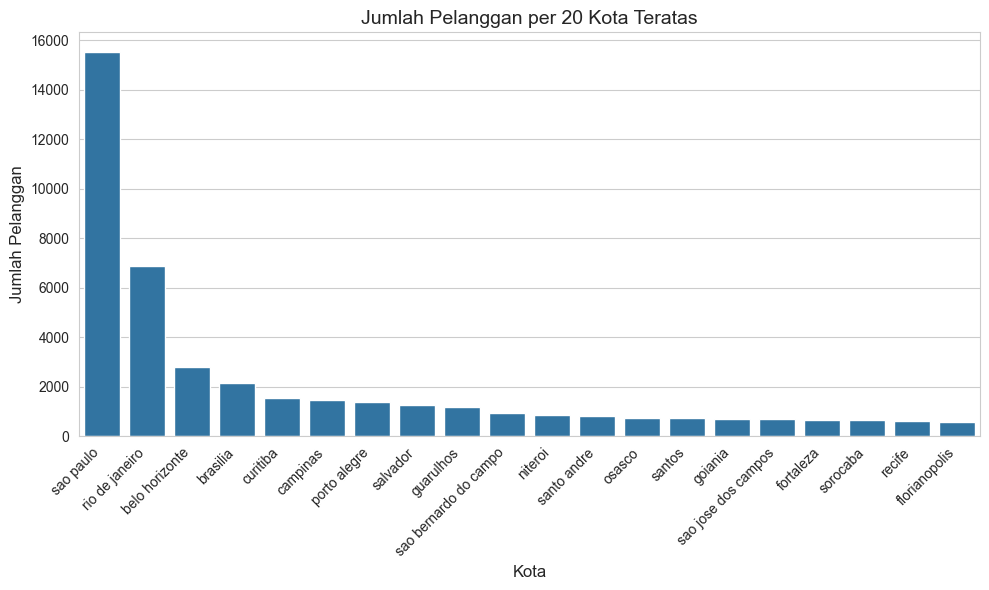

In [138]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))  
sns.countplot(data=customers_df, x="customer_city", order=customers_df["customer_city"].value_counts().index[:20])

plt.title("Jumlah Pelanggan per 20 Kota Teratas", fontsize=14)
plt.xlabel("Kota", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

Pertanyaan 2: Produk kategori apa yang paling banyak diorder?

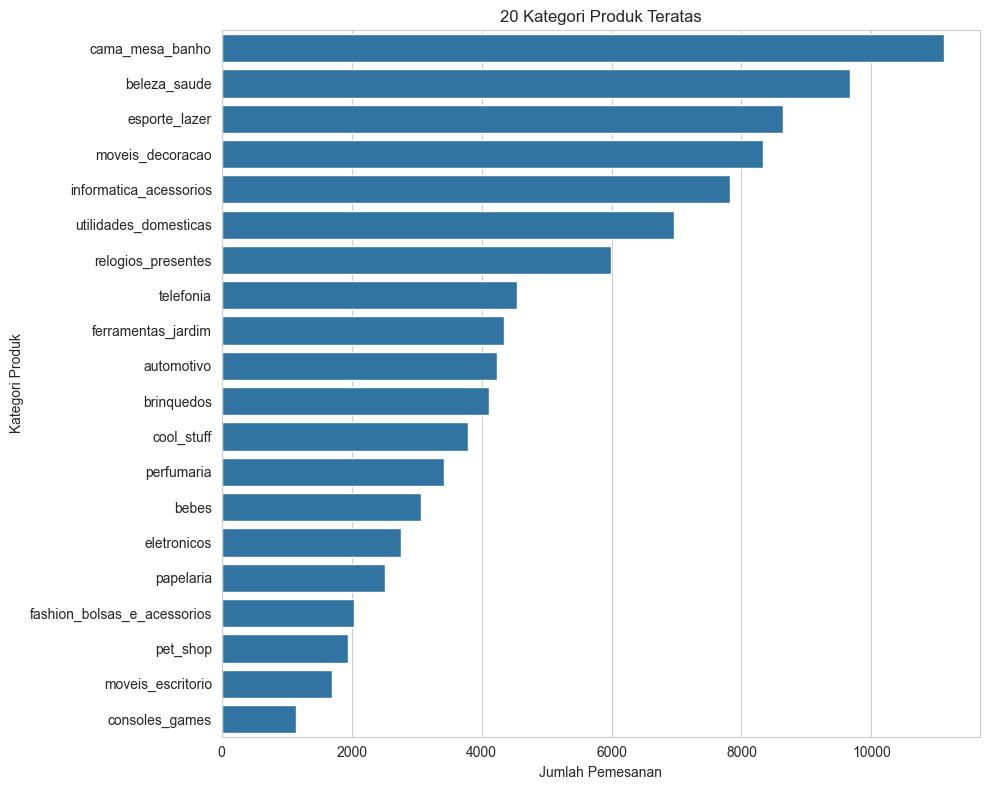

In [139]:
plt.figure(figsize=(10, 8))
sns.barplot(x=merged_df["product_category_name"].value_counts().head(20).values, y=merged_df["product_category_name"].value_counts().head(20).index)
plt.title("20 Kategori Produk Teratas")
plt.xlabel("Jumlah Pemesanan")
plt.ylabel("Kategori Produk")
plt.tight_layout()
plt.show()

Insight:
- Terlihat bahwa kota yang paling banyak pelanggannya adalah sao paulo, perbedaanya dengan kota lain bisa dibilang cukup drastis, mencapai lebih dari 2 kali lipat kota terbanyak kedua yaitu rio de janeiro, menurut saya, kedua kota ini lah yang paling banyak memiliki pelanggan, untuk kota ketiga dan seterusnya juga ada namun sangat kecil jika dibandingkan dengan 2 kota dengan pelanggan terbanyak. Dari sini, kita bisa memberikan masukan kepada pihak e-commerce untuk mengevaluasi hal ini. Tentunya ada berbagai faktor yang dapat mempengaruhi distribusi data yang tidak merata ini. Kita ingin distribusi data itu merata tanpa mengurangi pelanggan pada 2 kota dengan pelanggan terbanyak itu.
- Terlihat ada beberapa kategori produk yang cukup banyak dipesan, jika diambil 5 yang terbanyak ada cama besa banho, beleza saude, esprot laze, moveis decoracao, dan informatica acessorios. Sampai kategori terbanyak keenam menurut saya jumlah pemesannya masih cukup banyak, namun di bawah itu jumlah pemesannya cukup sedikit (jika dibandingkan yang teratas). Dari sini, kita dapat memberikan masukan pada pihak penjual yang ingin terjun ke dalam e-commerce tersebut terkait saran kategori produk apa yang paling banyak diminati sehingga ketika penjual tersebut masuk, produk yang mereka jual itu laris atau laku karena demand yang cukup tinggi, namun tetap perlu diperhatikan bahwa ada faktor lain yang perlu dipertimbangkan agar produknya laris.

Conclusion
- 5 wilayah dengan customer terbanyak adalah sao paulo, rio de janeiro, belo horizonte, brasilia, dan curitiba dengan jumlah pelanggan pada sao paulo dan rio de janeiro cukup berbeda signifikan dibandingkan dengan kota-kota lain
- 5 kategori produk yang paling banyak diorder adalah cama mesa_banho, beleza saude, esporte lazer, moveis decoracao, dan informatica acessorios dengan pengetahuan bahwa sampai kategori terbanyak keenam masih cukup banyak dipesan, namun kategori setelah itu menurun cukup banyak jika dibandingkan produk teratas 

In [141]:
customers_df.to_csv("customer_data.csv", index=False)

In [143]:
merged_df.to_csv("order_product_data.csv", index=False)